In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

In [10]:
len(df)

200

In [11]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

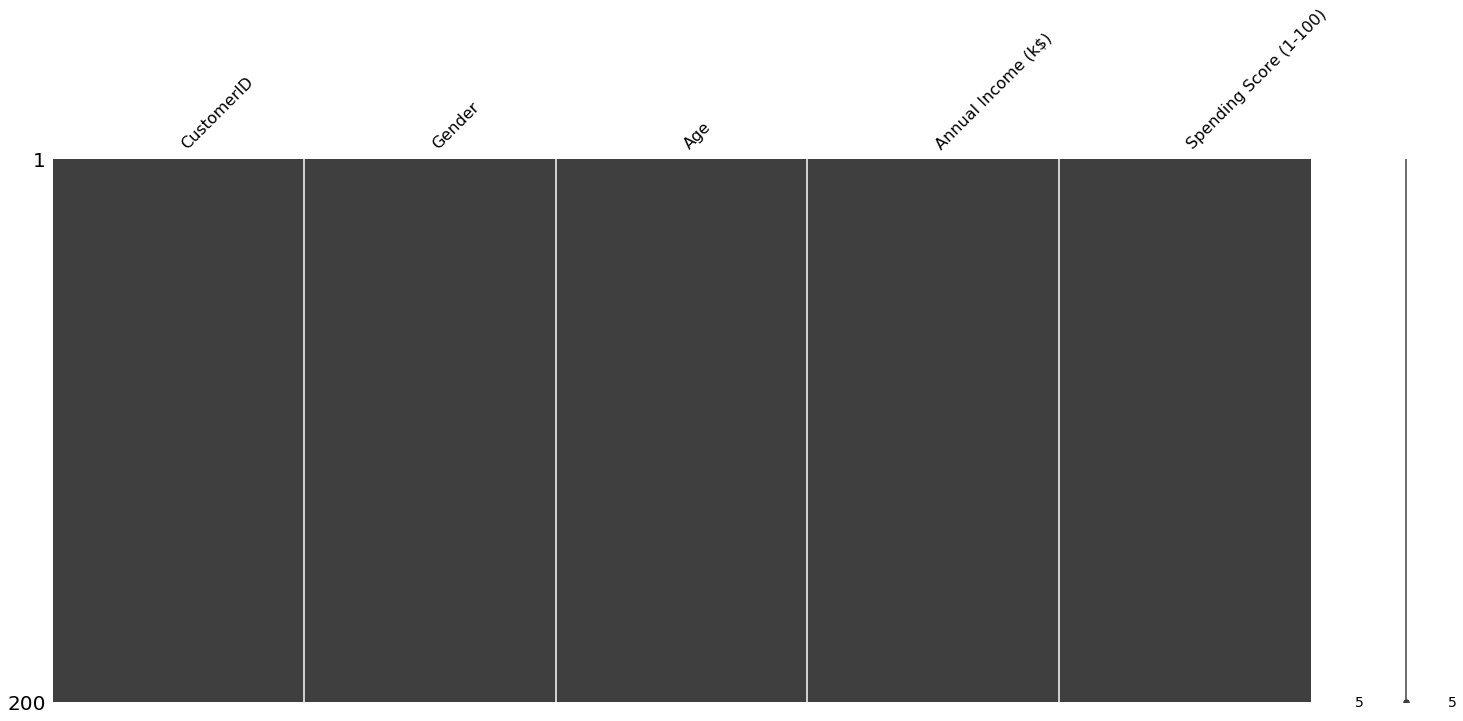

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
print(sum(df.duplicated()))

0


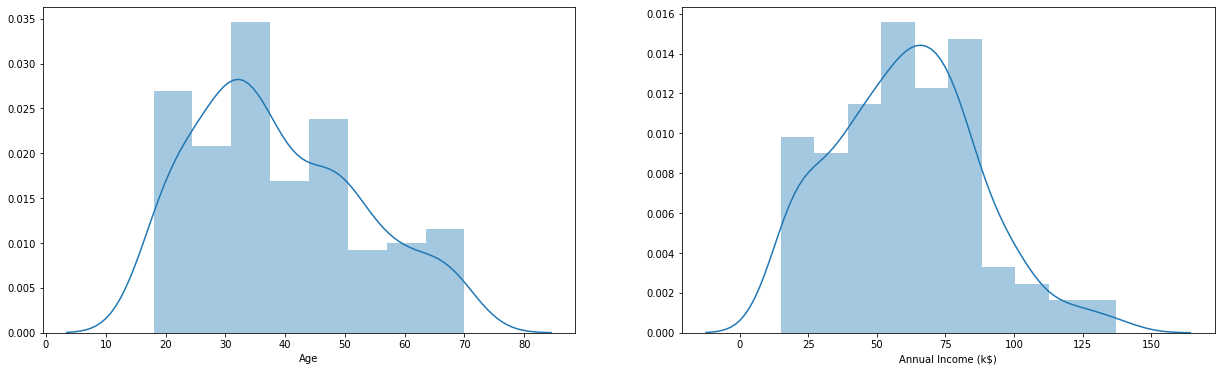

In [18]:
ig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(df['Age'], ax=axes[0])
sns.distplot(df['Annual Income (k$)'], ax=axes[1])

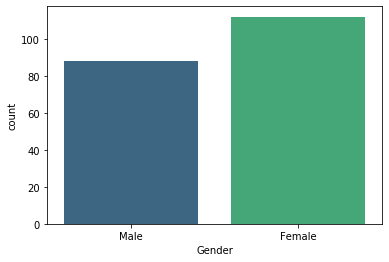

In [19]:
sns.countplot(x='Gender',data=df,palette='viridis')

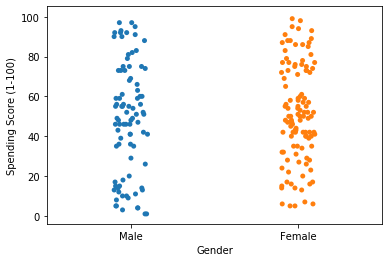

In [21]:
sns.stripplot(x = 'Gender', y = 'Spending Score (1-100)',data = df)

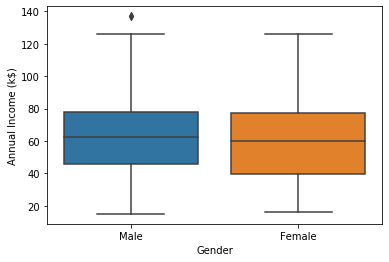

In [22]:
sns.boxplot(x='Gender',y='Annual Income (k$)',data=df)

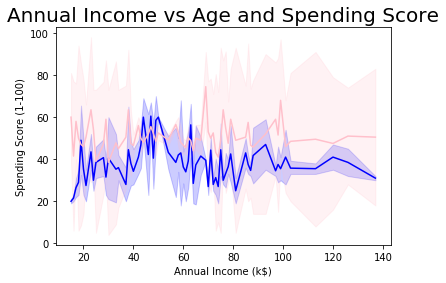

In [25]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [31]:
df.drop('CustomerID',axis=1,inplace=True)

KeyError: "['CustomerID'] not found in axis"

In [32]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


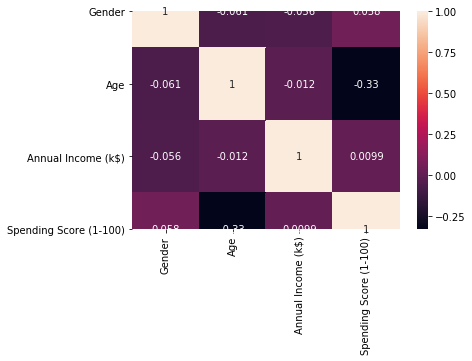

In [33]:
sns.heatmap(df.corr(),annot=True)

In [35]:
def impute_age(cols):
    spend=cols
    if spend > 55:
        return 1
    else:
        return 0
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].apply(impute_age)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,0
1,0,21,15,1
2,1,20,16,0
3,1,23,16,1
4,1,31,17,0


In [36]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,0
1,0,21,15,1
2,1,20,16,0
3,1,23,16,1
4,1,31,17,0
...,...,...,...,...
195,1,35,120,1
196,1,45,126,0
197,0,32,126,1
198,0,32,137,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('Spending Score (1-100)',axis=1), df['Spending Score (1-100)'], test_size=0.30, random_state=101)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)
pred=log.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        36
           1       0.55      0.25      0.34        24

    accuracy                           0.62        60
   macro avg       0.59      0.56      0.54        60
weighted avg       0.60      0.62      0.57        60



In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Spending Score (1-100)',axis=1))
scaled_features = scaler.transform(df.drop('Spending Score (1-100)',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Gender,Age,Annual Income (k$)
0,-1.128152,-1.424569,-1.738999
1,-1.128152,-1.281035,-1.738999
2,0.886405,-1.352802,-1.700830
3,0.886405,-1.137502,-1.700830
4,0.886405,-0.563369,-1.662660


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Spending Score (1-100)'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[28 13]
 [ 6 13]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.50      0.68      0.58        19

    accuracy                           0.68        60
   macro avg       0.66      0.68      0.66        60
weighted avg       0.72      0.68      0.69        60



Text(0, 0.5, 'Error Rate')

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

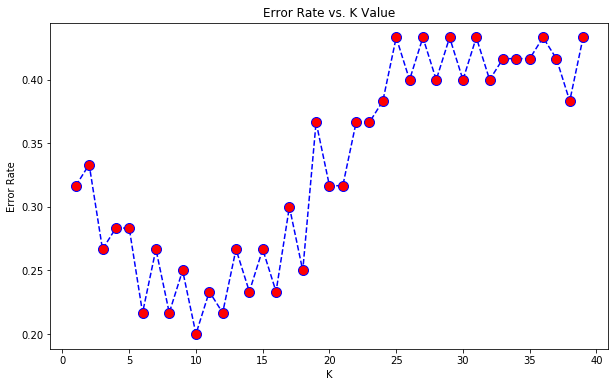

In [40]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=3


[[31 10]
 [ 6 13]]


              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.57      0.68      0.62        19

    accuracy                           0.73        60
   macro avg       0.70      0.72      0.71        60
weighted avg       0.75      0.73      0.74        60

